# Raw Data & Import

In [0]:
#Jait Purohit

import sklearn.feature_extraction.text as sk_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from pandas import Series
%matplotlib inline
import json
import csv
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
import time
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import time
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [0]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
from sklearn.metrics import roc_curve, auc

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


In [236]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
# 4/nQGR-xdp25F2tuLBwf1kKyjtJk-HJX5C0wYX_DV2soGrEWSo-HwfH6k

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pip install geopandas

     |████████████████████████████████| 901kB 3.2MB/s 
     |████████████████████████████████| 9.8MB 31.5MB/s 
     |████████████████████████████████| 17.9MB 34.7MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=c76f183acc0deabc0a013e1c3648ad2a4aa1d3deebc2ef6726248f1d3c05f9c1
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/masters_project/lorawan_dataset_antwerp.csv")

In [0]:
type(train_data)

pandas.core.frame.DataFrame

In [0]:
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-28T16:14:07.247000+00:00',12,1.02,51.216736,4.412130
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-11-28T12:01:02.380000+00:00',7,0.57,51.232037,4.405185
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-14T09:05:22.832000+00:00',9,1.00,51.202763,4.390477
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-17T09:11:49.222000+00:00',12,0.62,51.194584,4.417887
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-10T14:47:01.379000+00:00',12,1.00,51.207203,4.403470


In [0]:
# Time is not necessary, so we will remove it
train_data.drop(columns=["'RX Time'"],inplace=True)
#test_data.drop(columns=["'RX Time'"],inplace=True)

In [70]:
train_data.shape

(90515, 72)

# Base Stations on Map

In [0]:
pip install geopandas

In [0]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [0]:
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02,51.216736,4.412130
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57,51.232037,4.405185
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00,51.202763,4.390477
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62,51.194584,4.417887
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00,51.207203,4.403470


In [0]:
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
crs = {'init': 'epsg:4326'}
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02,51.216736,4.412130
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57,51.232037,4.405185
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00,51.202763,4.390477
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62,51.194584,4.417887
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00,51.207203,4.403470


In [0]:
# Converting to (X,Y)
geometry = [Point(xy) for xy in zip(train_data["Longitude"], train_data["Latitude"])]

In [0]:
geo_df = gpd.GeoDataFrame(train_data, crs = crs,geometry = geometry)

In [0]:
geo_df.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,geometry
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02,51.216736,4.412130,POINT (4.412129879 51.21673584)
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57,51.232037,4.405185,POINT (4.405184746000001 51.23203659)
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00,51.202763,4.390477,POINT (4.390476704 51.2027626)
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62,51.194584,4.417887,POINT (4.417886734 51.19458389)
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00,51.207203,4.403470,POINT (4.403470039 51.20720291)


In [0]:
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,geometry
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02,51.216736,4.412130,POINT (4.412129879 51.21673584)
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57,51.232037,4.405185,POINT (4.405184746000001 51.23203659)
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00,51.202763,4.390477,POINT (4.390476704 51.2027626)
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62,51.194584,4.417887,POINT (4.417886734 51.19458389)
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00,51.207203,4.403470,POINT (4.403470039 51.20720291)


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
geo_train = geo_df.sample(n = 1000)

In [0]:
geo_train.shape

(1000, 73)

In [0]:
pip install folium

In [0]:
#Part 1
# Let's change the basemap style to 'Stamen Toner'
import folium
m = folium.Map(location=[51.216736, 4.412130], tiles='Stamen Toner',
                zoom_start=12, control_scale=True, prefer_canvas=True)

m

In [0]:
# Create a Map instance
m = folium.Map(location=[51.216736, 4.412130],
    zoom_start=12, control_scale=True)

# Add marker
# Run: help(folium.Icon) for more info about icons
folium.Marker(
    lo
    cation=[51.216736, 4.412130],
    popup='Antwerp City Hall',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)

In [0]:
points_gjson = folium.features.GeoJson(geo_train, name = "Base stations")

In [0]:
# Create a Map instance
m = folium.Map(location=[51.216736, 4.412130], tiles = 'cartodbpositron', zoom_start=14, control_scale=True)

# Add points to the map instance
points_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
#m.add_child(points_gjson)

#Show map
m

In [0]:
pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28555 sha256=e781f5921db78e54914799ebb3a52a4ee2d445a880e89b8be0ef36c89b0a74aa
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet

In [0]:
# 1.Plot data:
geo_train.plot()

# 2. Convert plot to a web map:
mplleaflet.show()

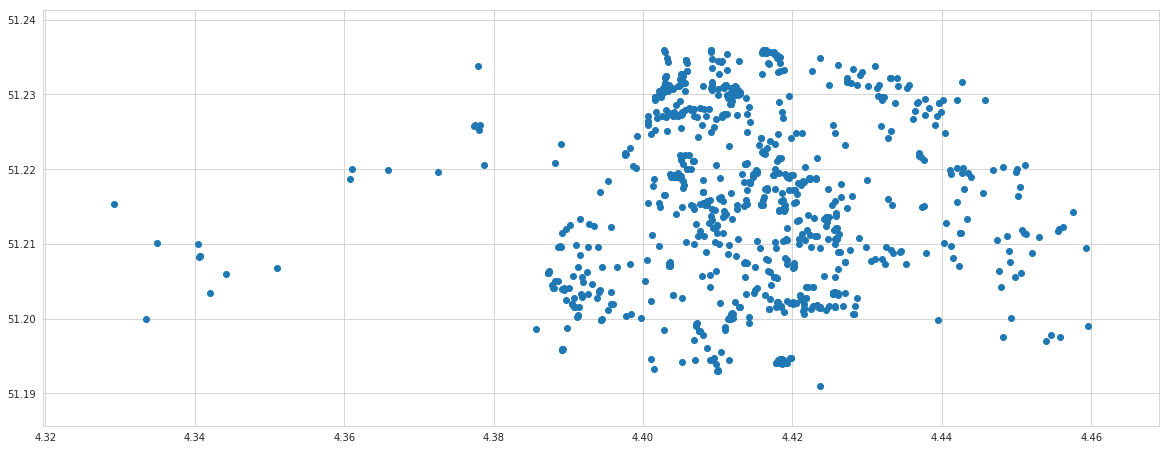

In [0]:
# 1. Plot data:
geo_train.plot(figsize=(20,20));

# Data Preprocessing

In [0]:
geo_df.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,geometry,distance
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02,51.216736,4.412130,POINT (4.412129879 51.21673584),733.210442
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57,51.232037,4.405185,POINT (4.405184746000001 51.23203659),1417.507615
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00,51.202763,4.390477,POINT (4.390476704 51.2027626),2030.745012
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62,51.194584,4.417887,POINT (4.417886734 51.19458389),2960.307633
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00,51.207203,4.403470,POINT (4.403470039 51.20720291),1357.936594


In [0]:
geo_df.describe()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,distance
count,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.00000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.00000,90515.000000,90515.000000,90515.0,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000
mean,-179.303066,-170.813059,-191.315881,-194.792841,-187.650876,-197.607148,-193.240369,-197.692493,-180.996100,-183.771408,-191.232613,-192.455251,-179.398409,-160.043142,-196.542849,-199.611788,-185.717351,-187.064895,-193.993084,-191.757874,-199.169574,-197.824670,-197.722035,-199.697310,-194.462940,-199.562437,-193.565199,-198.232735,-199.261504,-199.54929,-198.235342,-198.631354,-199.713793,-199.150693,-199.585671,-199.918069,-199.153499,-199.756946,-199.096150,-198.850434,-199.643739,-199.985052,-199.907120,-199.962537,-199.963840,-199.907253,-199.921980,-199.744042,-199.940827,-199.751157,-199.975639,-199.992852,-199.990189,-199.963299,-199.988422,-199.962139,-199.997249,-199.981230,-199.992521,-199.987615,-199.996277,-199.99905,-199.998862,-199.999061,-200.0,-199.994156,-199.999061,-199.999094,10.274949,0.792437,51.213483,4.414083,1861.727251
std,38.315835,44.906299,27.392112,21.226694,32.152025,14.534820,23.993144,14.466146,37.724607,37.759828,27.283226,25.449703,39.394342,47.307592,17.700979,5.906121,33.063932,32.724457,22.519511,26.159166,9.195125,13.913955,14.207073,5.730401,21.680018,6.586268,23.589913,12.866084,8.049674,6.71786,12.475811,10.788303,5.648665,8.706943,6.409764,2.664182,8.687912,4.817294,9.414886,10.196141,5.764053,1.202128,2.851795,1.805028,1.866393,3.044805,2.746895,4.660325,2.421768,4.756662,1.565756,0.815479,1.044914,1.793645,1.005728,2.015932,0.477830,1.331473,0.795575,1.033773,0.560065,0.28585,0.342355,0.282526,0.0,0.788951,0.282526,0.272555,1.686280,0.742089,0.013153,0.015150,932.849872
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,7.000000,0.510000,51.186169,4.325181,28.448078
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.

In [0]:
# check for missing values
geo_df.isnull().values.any()

False

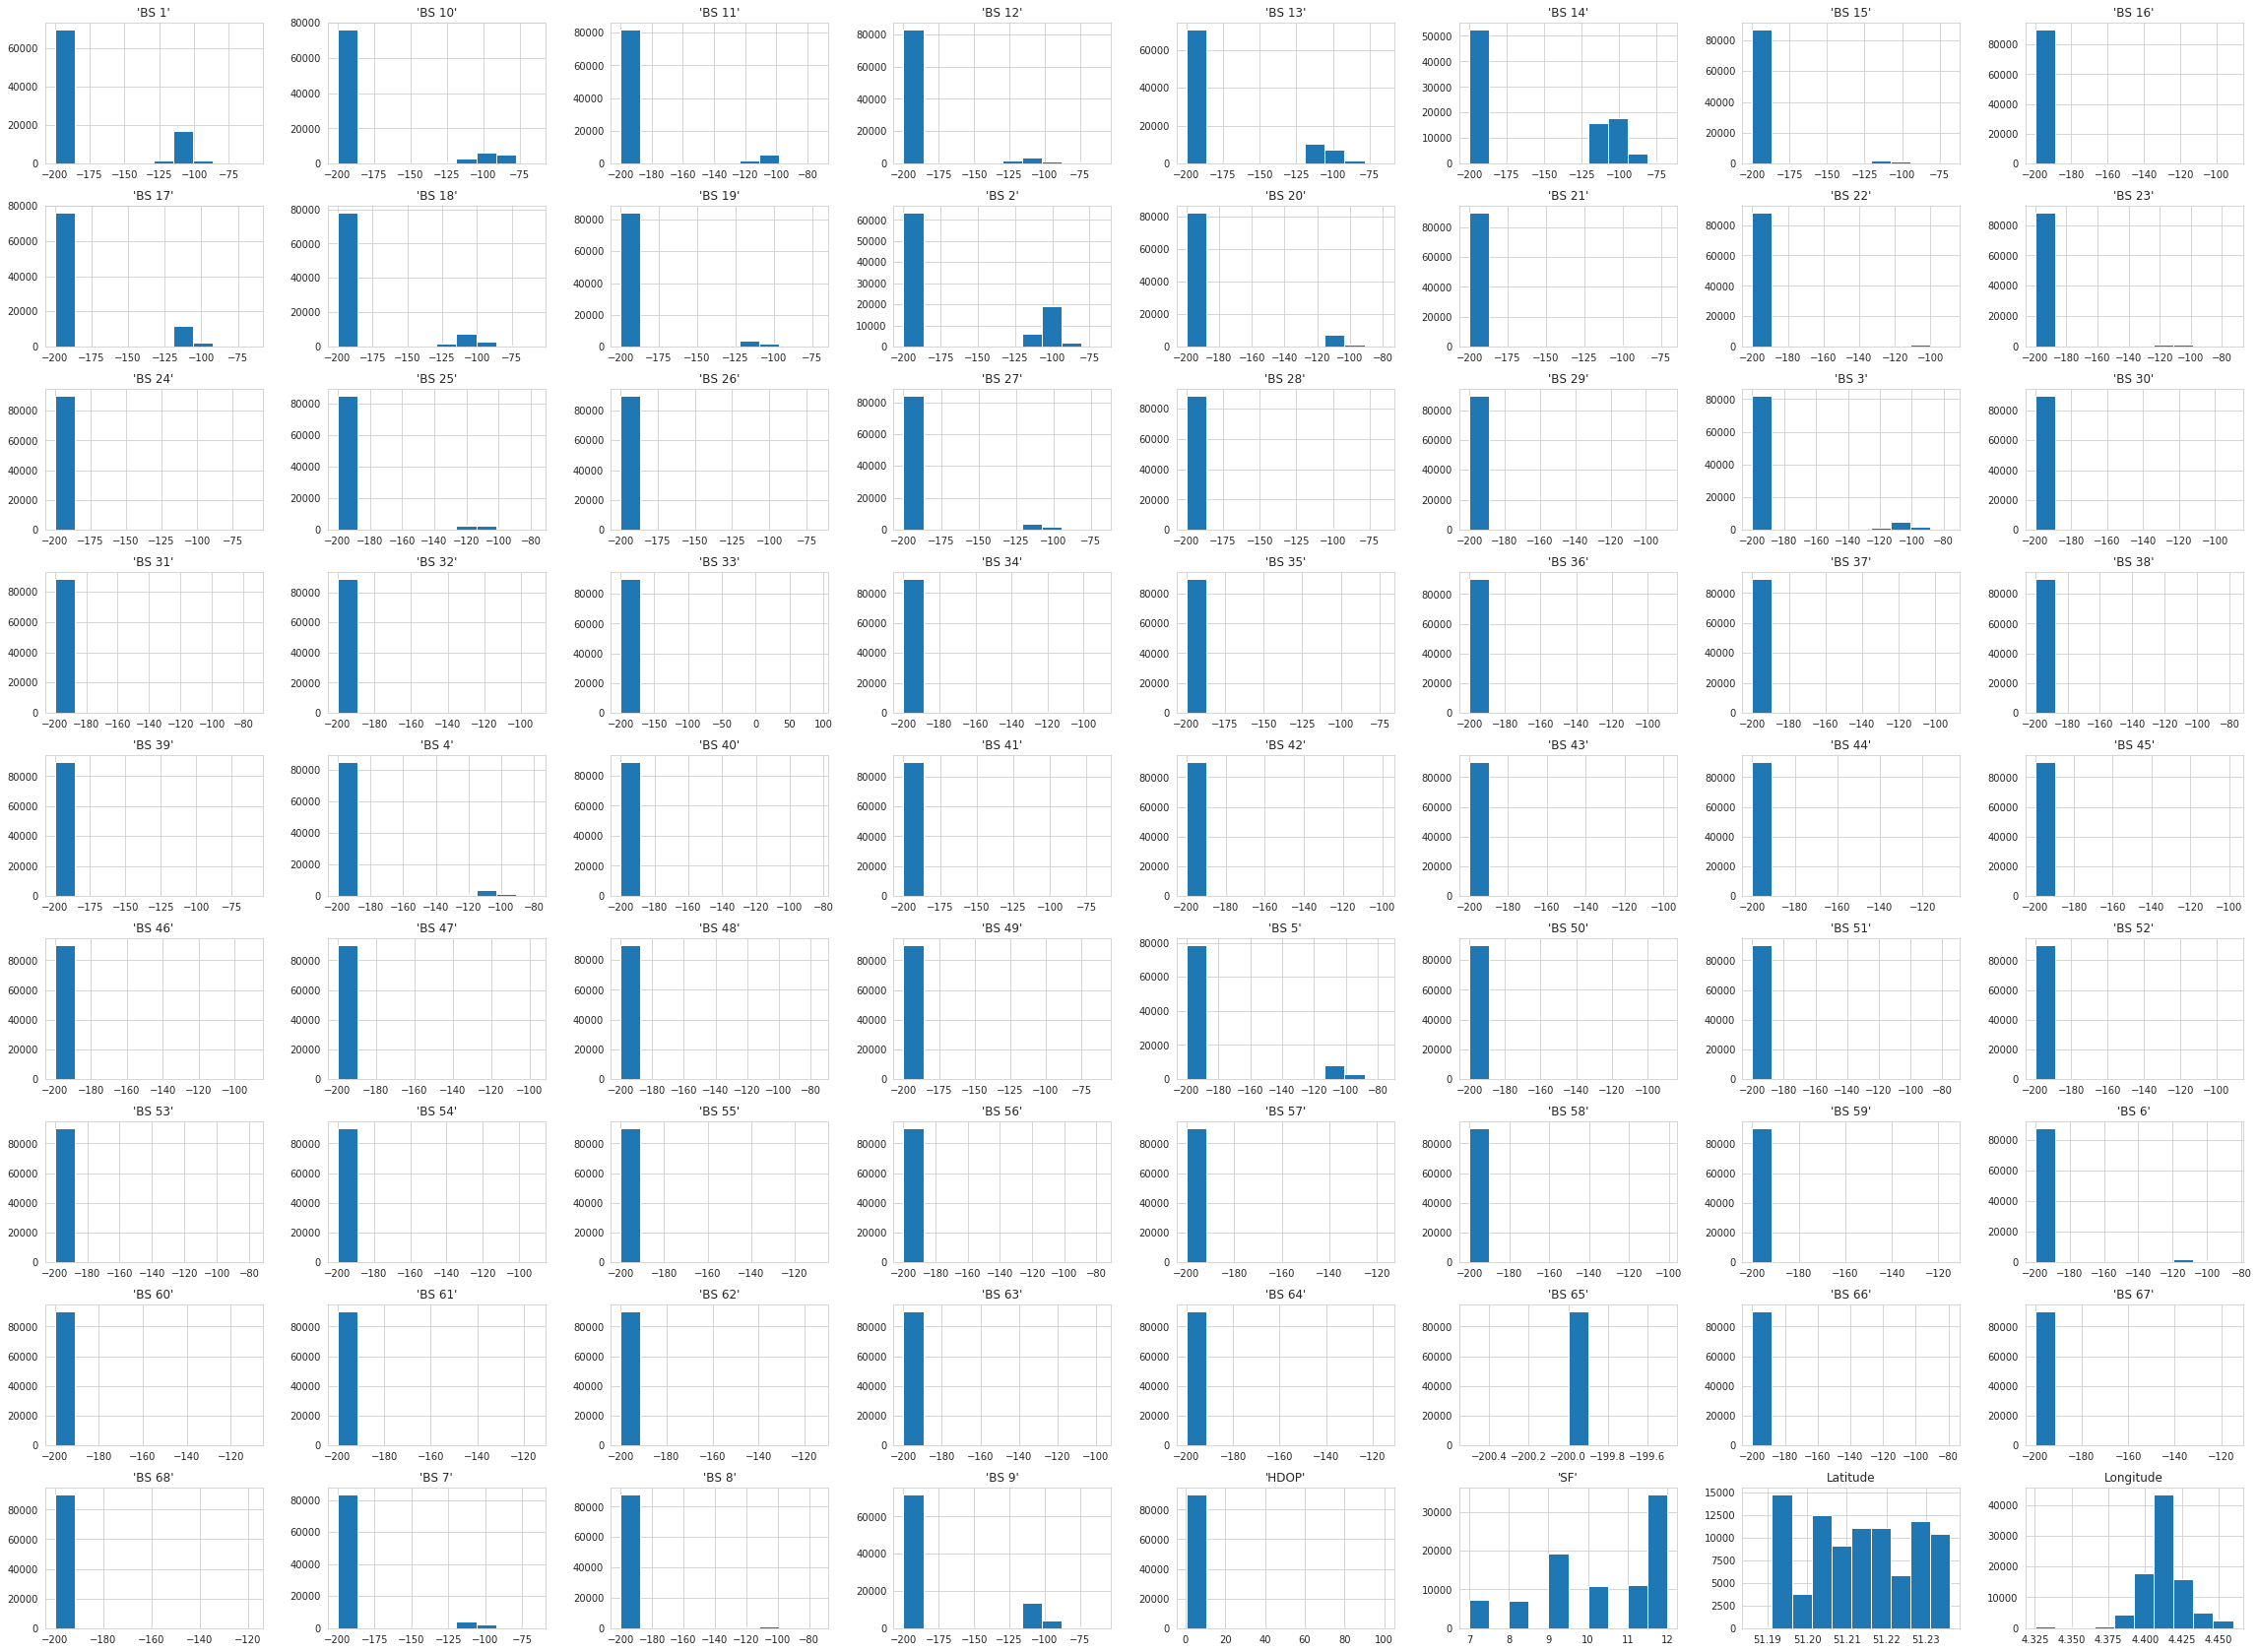

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt 
geo_df.hist(figsize=(40,30))# Plotting all the beacons values 
#x axis = RSSI value
#y axis = number of data points at a perticular RSSI value
plt.savefig('Leabeled_beacons_Histograms.png')
plt.show()

# Deep Learning Algorithms to Estimate/Predict Location

In [239]:
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP','Latitude','Longitude'
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02,51.216736,4.412130
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57,51.232037,4.405185
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00,51.202763,4.390477
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62,51.194584,4.417887
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00,51.207203,4.403470


In [0]:
train_data.replace(to_replace =-200, 
                 value =-95, inplace=True)

In [0]:
#train_data2 = train_data.drop(train_data.iloc[:, 10:-4], inplace = False, axis = 1)

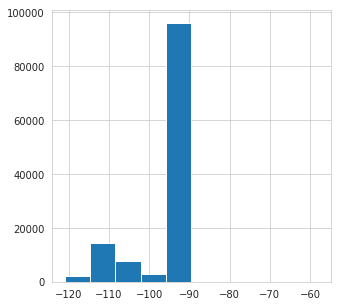

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt 
train_data["'BS 1'"].hist(figsize=(5,5))# Plotting all the beacons values 
#x axis = RSSI value
#y axis = number of data points at a perticular RSSI value
plt.savefig('Leabeled_beacons_Histograms.png')
plt.show()

In [241]:
traincols = train_data.columns.tolist() 
traincols.remove("'Latitude'")
traincols.remove("'Longitude'")
len(traincols)

70

In [0]:
columns_X = traincols
x = train_data[columns_X]
columns_y = ["'Latitude'","'Longitude'"]
y = train_data[columns_y]

In [193]:
x.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP'
0,-95,-95,-95,-95,-95,-95,-95,-95,-114,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-113,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,1.02
1,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-102,-95,-103,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,7,0.57
2,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-106,-95,-95,-95,-95,-95,-97,-95,-84,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,9,1.00
3,-95,-100,-95,-95,-95,-95,-95,-95,-95,-113,-95,-95,-95,-106,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.62
4,-95,-106,-107,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-109,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,1.00


In [194]:
y.head()

,'Latitude','Longitude'
0,51.216736,4.412130
1,51.232037,4.405185
2,51.202763,4.390477
3,51.194584,4.417887
4,51.207203,4.403470


In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
def print_report(y_pred,y_true):
    print("Accuracy: ", metrics.accuracy_score(y_true,y_pred))
    print("Precision: ", metrics.precision_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("Recall: ", metrics.recall_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("F1_Score: ", metrics.f1_score(y_true,y_pred, pos_label=1, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    outcome = encode_text_index(train_data,"'Longitude'","'Latitude'")
    print('Plotting confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, outcome)
    plt.show()
    print(classification_report(y_true, y_pred))

In [197]:
train_data.shape

(123528, 72)

In [198]:
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP','Latitude','Longitude'
0,-95,-95,-95,-95,-95,-95,-95,-95,-114,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-113,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,1.02,51.216736,4.412130
1,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-102,-95,-103,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,7,0.57,51.232037,4.405185
2,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-106,-95,-95,-95,-95,-95,-97,-95,-84,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,9,1.00,51.202763,4.390477
3,-95,-100,-95,-95,-95,-95,-95,-95,-95,-113,-95,-95,-95,-106,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.62,51.194584,4.417887
4,-95,-106,-107,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-109,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,1.00,51.207203,4.403470


In [0]:
x_train, x_test, y_train, y_test = train_test_split(train_data[traincols],train_data[columns_y], test_size=0.3, random_state=42)

## Artificial Neural Network

In [200]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os
import io
import requests
from sklearn import metrics


x_train_ann_class, x_test_ann_class, y_train_ann_class, y_test_ann_class = train_test_split(x,y, test_size=0.3, random_state=42)
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/masters_project/best_weights_fairclass.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    model = Sequential()
    model.add(Dense(30, input_dim=x.shape[1], activation='softmax')) # Hidden 1
    model.add(Dense(30, activation='sigmoid')) # Hidden 2
    model.add(Dense(15, activation='sigmoid')) # Hidden 3
    model.add(Dense(2)) # Output
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model.fit(x_train_ann_class, y_train_ann_class, validation_data=(x_test_ann_class,y_test_ann_class), callbacks=[monitor,checkpointer], verbose=2, epochs=100)  

    

model.load_weights('/content/drive/My Drive/Colab Notebooks/masters_project/best_weights_fairclass.hdf5')
pred = model.predict(x_test_ann_class)


Train on 86469 samples, validate on 37059 samples
Epoch 1/100
 - 8s - loss: 574.3462 - val_loss: 163.7908
Epoch 2/100
 - 6s - loss: 48.1836 - val_loss: 1.7500
Epoch 3/100
 - 6s - loss: 0.1967 - val_loss: 2.0366e-04
Epoch 4/100
 - 6s - loss: 2.0246e-04 - val_loss: 2.0767e-04
Epoch 5/100
 - 6s - loss: 2.0543e-04 - val_loss: 2.0420e-04
Epoch 6/100
 - 6s - loss: 2.0668e-04 - val_loss: 2.2100e-04
Epoch 7/100
 - 6s - loss: 2.0733e-04 - val_loss: 2.0684e-04
Epoch 8/100
 - 6s - loss: 2.0836e-04 - val_loss: 2.0467e-04
Epoch 00008: early stopping
Train on 86469 samples, validate on 37059 samples
Epoch 1/100
 - 8s - loss: 539.1374 - val_loss: 129.6225
Epoch 2/100
 - 6s - loss: 33.7209 - val_loss: 0.5542
Epoch 3/100
 - 6s - loss: 0.0517 - val_loss: 2.0347e-04
Epoch 4/100
 - 6s - loss: 2.0317e-04 - val_loss: 2.1056e-04
Epoch 5/100
 - 6s - loss: 2.0635e-04 - val_loss: 2.0421e-04
Epoch 6/100
 - 6s - loss: 2.0654e-04 - val_loss: 2.0461e-04
Epoch 7/100
 - 6s - loss: 2.0806e-04 - val_loss: 2.0940e-04
Ep

In [201]:
print(pred)

[[51.213528  4.414186]
 [51.213528  4.414186]
 [51.213528  4.414186]
 ...
 [51.213524  4.414186]
 [51.213524  4.414186]
 [51.213524  4.414186]]


In [214]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ann_class, pred)*10000)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ann_class, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ann_class, pred))*10000)

Mean Absolute Error: 109.62645425142858
Mean Squared Error: 0.00020329534597266446
Root Mean Squared Error: 142.58167693384183


## KNN

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Grid Search Cross Validation¶
Grid Search CV implements an exhaustive search over specified parameter values for an estimator. Important members are fit, predict.

It iterates through a dictionary of hyper parameters and choose the combination that better fits the model.

In [0]:
# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [205]:
# Create a k-Nearest Neighbors Regression estimator
knn_estimator = KNeighborsRegressor()
knn_parameters = {"n_neighbors": [1,5,11]}
knn_best = cv_optimize(knn_estimator, knn_parameters, x_train, y_train, score_func='neg_mean_squared_error')

BEST {'n_neighbors': 5} -3.84618178927619e-05 {'mean_fit_time': array([8.02390065, 7.93289099, 7.94300275]), 'std_fit_time': array([0.23656631, 0.23368209, 0.29185918]), 'mean_score_time': array([110.86927915, 138.40323286, 155.52015924]), 'std_score_time': array([2.22877157, 2.32134398, 2.86926399]), 'param_n_neighbors': masked_array(data=[1, 5, 11],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 5}, {'n_neighbors': 11}], 'split0_test_score': array([-5.42103273e-05, -3.74964774e-05, -3.85060461e-05]), 'split1_test_score': array([-5.32173658e-05, -3.86287047e-05, -3.92645350e-05]), 'split2_test_score': array([-5.39728116e-05, -3.92317476e-05, -4.02953698e-05]), 'split3_test_score': array([-5.28164533e-05, -3.84845653e-05, -3.95481068e-05]), 'split4_test_score': array([-5.35485674e-05, -3.84675948e-05, -3.85471599e-05]), 'mean_test_score': array([-5.35531051e-05, -3.84618179e-05, -3.92322515e-05])

In [206]:
knn_reg=knn_best.fit(x_train, y_train)
knn_training_accuracy = knn_reg.score(x_train, y_train)
knn_test_accuracy = knn_reg.score(x_test, y_test)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.8f" % (knn_training_accuracy))
print ("R^2 on test data:     %0.8f" % (knn_test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.88010148
R^2 on test data:     0.81708371


In [0]:
# Calculate the Root Mean Squared Error
RMSE = np.sqrt(mean_squared_error(knn_reg.predict(x_test),y_test))

In [211]:
print(RMSE*10000)

60.97810850988136


## Create x and y in the format RNN accepts

In [0]:
xarray=[]
xarray=train_data.as_matrix()

In [247]:
xarray

array([[ -95.        ,  -95.        ,  -95.        , ...,    1.01999998,
          51.21673584,    4.41212988],
       [ -95.        ,  -95.        ,  -95.        , ...,    0.56999999,
          51.23203659,    4.40518475],
       [ -95.        ,  -95.        ,  -95.        , ...,    1.        ,
          51.2027626 ,    4.3904767 ],
       ...,
       [ -95.        ,  -95.        ,  -95.        , ...,    0.81999999,
          51.21537018,    4.4125185 ],
       [ -95.        ,  -97.        ,  -95.        , ...,    0.61000001,
          51.19425201,    4.41835356],
       [ -82.        ,  -95.        , -100.        , ...,    0.56999999,
          51.19099426,    4.44960165]])

In [0]:
yarray=train_data[["'Latitude'","'Longitude'"]].as_matrix()

In [0]:
SEQUENCE_SIZE = 1
import numpy as np

def to_sequences(seq_size, data,data2):
    x = []
    y = []

    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = data[i:(i+SEQUENCE_SIZE)]
        after_window = data2[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [0]:
x,y = to_sequences(SEQUENCE_SIZE,xarray,yarray)

In [251]:
x.shape

(123526, 1, 1, 72)

In [252]:
y.shape

(123526, 2)

In [0]:
x_rnn = x.reshape(x.shape[0],1,72)

In [0]:
y_rnn = y.reshape(y.shape[0], 2)

In [255]:
x_rnn.shape

(123526, 1, 72)

In [256]:
y_rnn.shape

(123526, 2)

## LSTM - Ready to train a RNN model 

In [0]:
x_train_lstm = x_rnn[0:2800]
y_train_lstm = y_rnn[0:2800]
x_test_lstm = x_rnn[2800:4385]
y_test_lstm = y_rnn[2800:4385]

In [227]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np

checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/masters_project/best_weights_fairclass1.hdf5", verbose=0, save_best_only=True) # save best model

print('Build model...')
for i in range(5):
    model = Sequential()
    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(1, 72)))
    model.add(Dense(32))
    model.add(Dense(2))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor],verbose=2, epochs=10)
    
model.load_weights('/content/drive/My Drive/Colab Notebooks/masters_project/best_weights_fairclass1.hdf5')
pred = model.predict(x_test_lstm)

Build model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2800 samples, validate on 1585 samples
Epoch 1/10
 - 4s - loss: 801.4473 - val_loss: 325.2190
Epoch 2/10
 - 0s - loss: 101.5139 - val_loss: 2.0312
Epoch 3/10
 - 0s - loss: 0.2090 - val_loss: 3.4683e-04
Epoch 4/10
 - 0s - loss: 0.0091 - val_loss: 5.1036e-04
Epoch 5/10
 - 0s - loss: 0.0080 - val_loss: 2.2052e-04
Epoch 6/10
 - 0s - loss: 0.0079 - val_loss: 2.4440e-04
Epoch 7/10
 - 0s - loss: 0.0094 - val_loss: 2.5649e-04
Epoch 8/10
 - 0s - loss: 0.0035 - val_loss: 2.5355e-04
Epoch 00008: early stopping
Train...
Train on 2800 samples, validate on 1585 samples
Epoch 1/10
 - 4s - loss: 871.4194 - val_loss: 422.5952
Epoch 2/10
 - 1s - loss: 146.2560 - val_loss: 7.2371
Epoch 3/10
 - 1s - loss: 0.9595 - val_loss: 2.3181e-04
Epoch 4/10
 - 0s - loss: 0.0060 -

ValueError: ignored

In [229]:
pred = model.predict(x_test_lstm)
score = metrics.mean_squared_error(pred,y_test_lstm)
print("Final score (MSE): {}".format(score))
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("Final score (RMSE): {}".format(score*10000))
#chart_regression(pred.flatten(),y_test_lstm)

Final score (MSE): 0.0001983301285914072
Final score (RMSE): 140.82973002580357


## Save Best Model(LSTM)

In [230]:
sampleValue = pd.DataFrame(train_data, columns=(columns_X + columns_y))
sampleValue = sampleValue.sample(10)
sampleValue

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP','Latitude','Longitude'
5827,-112,-99,-95,-95,-95,-95,-95,-95,-95,-84,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.68,51.194435,4.418507
98067,-115,-105,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-110,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,10,1.02,51.213577,4.410767
88271,-95,-95,-95,-95,-95,-95,-95,-95,-111,-95,-95,-95,-114,-114,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,11,0.68,51.224895,4.425793
49816,-95,-95,-95,-95,-95,-95,-115,-95,-95,-95,-95,-95,-113,-104,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,10,0.76,51.231850,4.426710
65677,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-91,-95,-95,-95,-95,-95,-95,-72,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-105,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.65,51.217583,4.418098
54995,-95,-95,-95,-95,-109,-109,-95,-95,-95,-95,-95,-95,-95,-104,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,7,0.69,51.228020,4.401563
4631,-114,-101,-95,-95,-95,-95,-95,-95,-95,-92,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,11,0.70,51.194435,4.418588
93975,-108,-100,-95,-95,-95,-95,-95,-95,-95,-118,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.80,51.201626,4.422061
52174,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-117,-95,-97,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.75,51.215603,4.418657
32161,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-120,-95,-95,-95,-95,-119,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,12,0.85,51.210945,4.425870


In [0]:
y_pred = knn_reg.predict(sampleValue.iloc[:,:-3])
y_pred

In [0]:
y_pred.shape

(10, 3)

In [0]:
# Save the model
from sklearn.externals import joblib
joblib.dump(knn_reg, 'knn_model.pkl')

['knn_model.pkl']

## CNN

In [0]:
x_cnn = x.reshape(x.shape[0],1,72)

In [286]:
x_cnn.shape

(123526, 1, 72)

In [0]:
y_cnn = y_rnn

In [0]:
x_train_cnn = x_cnn[0:2800]
y_train_cnn = y_cnn[0:2800]
x_test_cnn = x_cnn[2800:4385]
y_test_cnn = y_cnn[2800:4385]

In [292]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
batch_size = 64
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/masters_project/best_weights_fairclass1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    model = Sequential()
    input_shape = (1, 72, 2)
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu',input_shape=input_shape)) 
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None,padding='same'))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    #model.summary()
    model.compile(loss="mean_squared_error", optimizer="adam")
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience =5, verbose=2, mode='auto')
    model.fit(x_train_cnn, y_train_cnn,batch_size=batch_size,epochs=3,verbose=1,validation_data=(x_test_cnn, y_test_cnn),callbacks=[monitor,checkpointer])

model.load_weights('/content/drive/My Drive/Colab Notebooks/masters_project/best_weights_fairclass1.hdf5')   

ValueError: ignored

Final score (MSE): 0.0003520454137000068
Final score (RMSE): 0.01876287327943156


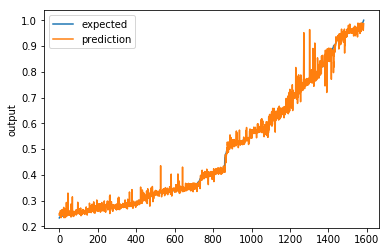

In [0]:
pred = model.predict(x_test_cnn)
score = metrics.mean_squared_error(pred,y_test_cnn)
print("Final score (MSE): {}".format(score))
score = np.sqrt(metrics.mean_squared_error(pred,y_test_cnn))
print("Final score (RMSE): {}".format(score))
chart_regression(pred.flatten(),y_test_cnn)

## Load saved model to predict Test Data

In [0]:
#Loading the saved model with joblib
pipe = joblib.load('knn_model.pkl')

# New data to predict
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/masters_project/test.csv')
test_data.drop(columns=['Time'],inplace=True)
test_trim_data = test_data[ test_data["'BS 1'"] >= -120 ]

from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lat1 = 51.2194
    lon1 = 4.4025
    lon2 = row['Longitude']
    lat2 = row['Latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    kms = 6371 * c
    return kms

test_trim_data['distance'] = test_trim_data.apply(lambda row: haversine(row), axis=1)
test_trim_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,distance
5,-97,-95,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.70,51.194382,4.418537,2.997852
8,-114,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.61,51.200665,4.411805,2.181801
15,-114,-99,-200,-200,-200,-200,-200,-200,-200,-99,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.75,51.194359,4.418555,3.000684
16,-114,-200,-200,-200,-200,-200,-200,-200,-200,-100,-112,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.70,51.194328,4.418320,2.997786
17,-91,-200,-104,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.86,51.203358,4.425312,2.388926


In [0]:
pred_cols = list(test_trim_data.columns.values)[:-3]
print(pred_cols)

# apply the whole pipeline to data
pred = pd.DataFrame(pipe.predict(test_trim_data[pred_cols]))
pred.head()

["'BS 1'", "'BS 2'", "'BS 3'", "'BS 4'", "'BS 5'", "'BS 6'", "'BS 7'", "'BS 8'", "'BS 9'", "'BS 10'", "'BS 11'", "'BS 12'", "'BS 13'", "'BS 14'", "'BS 15'", "'BS 16'", "'BS 17'", "'BS 18'", "'BS 19'", "'BS 20'", "'BS 21'", "'BS 22'", "'BS 23'", "'BS 24'", "'BS 25'", "'BS 26'", "'BS 27'", "'BS 28'", "'BS 29'", "'BS 30'", "'BS 31'", "'BS 32'", "'BS 33'", "'BS 34'", "'BS 35'", "'BS 36'", "'BS 37'", "'BS 38'", "'BS 39'", "'BS 40'", "'BS 41'", "'BS 42'", "'BS 43'", "'BS 44'", "'BS 45'", "'BS 46'", "'BS 47'", "'BS 48'", "'BS 49'", "'BS 50'", "'BS 51'", "'BS 52'", "'BS 53'", "'BS 54'", "'BS 55'", "'BS 56'", "'BS 57'", "'BS 58'", "'BS 59'", "'BS 60'", "'BS 61'", "'BS 62'", "'BS 63'", "'BS 64'", "'BS 65'", "'BS 66'", "'BS 67'", "'BS 68'", "'SF'", "'HDOP'"]


,0,1,2
0,51.194291,4.418608,3.009128
1,51.199379,4.407214,2.273603
2,51.194312,4.418344,3.000097
3,51.194392,4.418404,2.993597
4,51.199367,4.445014,3.733501


In [0]:
pred2 = pred.rename(columns={0: "Predicted_Latitude", 1: "Predicted_Longitude", 2: "Predicted_Distance"})

In [0]:
pred2.head()

,Predicted_Latitude,Predicted_Longitude,Predicted_Distance
0,51.194291,4.418608,3.009128
1,51.199379,4.407214,2.273603
2,51.194312,4.418344,3.000097
3,51.194392,4.418404,2.993597
4,51.199367,4.445014,3.733501


In [0]:
pred2.shape

(7491, 3)

In [0]:
test_y_latlong['BS1_RSSI'] = test_trim_data["'BS 1'"]
test_y_actual['Actual_Distance']=test_trim_data[['distance']]
test_y_actual['Actual_Latitude']=test_trim_data[['Latitude']]
test_y_actual['Actual_Longitude']=test_trim_data[['Longitude']]

test_y_actual.head(10)

In [0]:
df_test_matrix = test_y_latlong.join(test_y_actual)

In [0]:
test_trim_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,distance
5,-97,-95,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.70,51.194382,4.418537,2.997852
8,-114,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.61,51.200665,4.411805,2.181801
15,-114,-99,-200,-200,-200,-200,-200,-200,-200,-99,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.75,51.194359,4.418555,3.000684
16,-114,-200,-200,-200,-200,-200,-200,-200,-200,-100,-112,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.70,51.194328,4.418320,2.997786
17,-91,-200,-104,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.86,51.203358,4.425312,2.388926


## Matrix for Predicted location

In [0]:
df_test_matrix.drop(columns=["'BS 1'",'distance','Latitude','Longitude'],inplace=True)

In [0]:
test_trim_data.iloc[:,70:].join(pred1).head()

,Latitude,Longitude,distance,Predicted_Latitude,Predicted_Longitude,Predicted_Distance
5,51.194382,4.418537,2.997852,51.194355,4.418594,3.002110
8,51.200665,4.411805,2.181801,51.206766,4.351904,4.255275
15,51.194359,4.418555,3.000684,51.194310,4.418574,3.006235
16,51.194328,4.418320,2.997786,51.215488,4.432356,2.393608
17,51.203358,4.425312,2.388926,51.212390,4.425987,1.815763
